In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import re
from statannot import add_stat_annotation

In [2]:
PX_SIZE_UM = 1.6

In [4]:
def load_dataset(csv_path='stats.csv', data_path='/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/Cell_number/14022020_SUMO-number/D*/*stats.csv'):
    if os.path.exists(csv_path):
        dfs_all = pd.read_csv(csv_path, index_col=0)
        print('Loaded `stats.csv`')
    else:
        print('Loading raw data')
        paths = sorted(glob(data_path))
        assert (lp := len(paths)), 'Data not found'
        print(f'Found {lp} datasets')
        
        r = re.compile(r'D_(\d)/(\S*)_stats.csv')
        labels = [r.findall(p)[0] for p in paths]
        print(f'Labels: {labels}')
        
        dfs = []
        for path, l in zip(paths, labels):
            try:
                df = pd.read_csv(path, index_col=0)
                df['chip'] = l[1]
                df['day'] = l[0]
                dfs.append(df)
            except UnicodeDecodeError:
                print(f'bad file {path}')
        dfs_all = pd.concat(dfs)
        print(f'concatenate {lp} datasets')
        dfs_all['major_axis_length_um'] = dfs_all.major_axis_length * PX_SIZE_UM
        dfs_all.to_csv(csv_path)
        print(f'Saved to {csv_path}')
        
    return dfs_all


In [6]:
dfs_all = load_dataset(csv_path='23_01_2020_stats.csv', data_path='/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/23_01_2020/D*/*_stats.csv')

Loading raw data
Found 14 datasets
Labels: [('1', 'Chip_1'), ('1', 'Chip_2'), ('1', 'Chip_3'), ('1', 'Chip_4'), ('4', 'Chip_1'), ('4', 'Chip_2'), ('4', 'Chip_3'), ('4', 'Chip_4'), ('5', 'Chip_1'), ('5', 'Chip_4'), ('6', 'Chip_1'), ('6', 'Chip_4'), ('7', 'Chip_1'), ('7', 'Chip_4')]
concatenate 14 datasets
Saved to 23_01_2020_stats.csv


In [24]:
dfs_all.index = dfs_all.chip

In [7]:
cell_nums = dfs_all.chip.unique()
cell_nums

array(['Chip_1', 'Chip_2', 'Chip_3', 'Chip_4'], dtype=object)

In [8]:
days = dfs_all.day.unique()
days

array(['1', '4', '5', '6', '7'], dtype=object)

In [12]:
test_params_days = dict(test='Mann-Whitney', text_format='star', loc='inside', verbose=1,
                                    box_pairs=(('100+cond', '100'),
                                               ('200+cond', '200'),
                                               ('300+cond', '300'),
#                                                ('100', '200'),
#                                                ('100', '300')
                                              )
                  )

In [18]:
def plot_days(dfs_all, x='chip', y=['eccentricity', 'major_axis_length_um'], figsize=(10,4)):
    for day in dfs_all.day.unique():
        print(f'day {day}')
        fig, ax = plt.subplots(ncols=len(y), figsize=figsize)
        df = dfs_all[dfs_all.day == day]
        
        for _ax, _y in zip(ax, y):
            sns.swarmplot(data=df, x=x, y=_y, ax=_ax, size=3)
            sns.boxplot(data=df, x=x, y=_y, boxprops=dict(alpha=.3), ax=_ax)
            ax[0].set_title(f'{_y}: Day {day}')

        #     stats_ecc = add_stat_annotation(data=df, x='cell_number', y='eccentricity', ax=ax[0], **test_params_days)


        plt.tight_layout()
        plt.show()

day 1


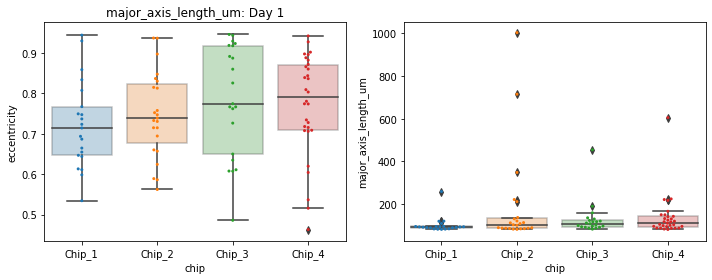

day 4


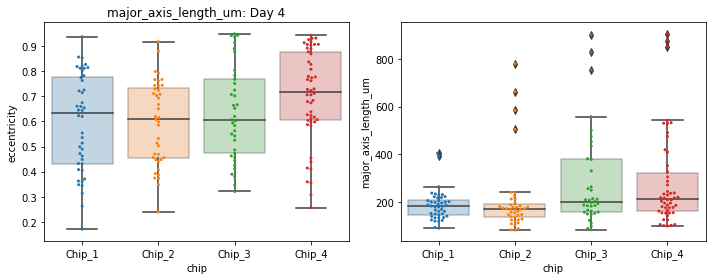

day 5


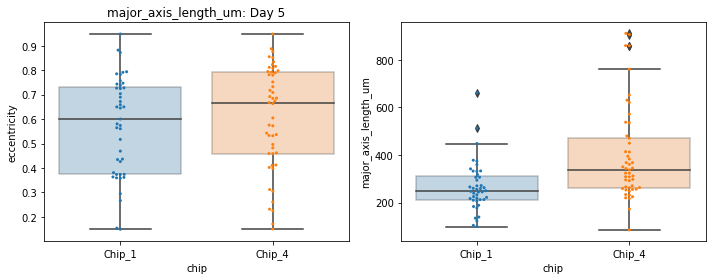

day 6


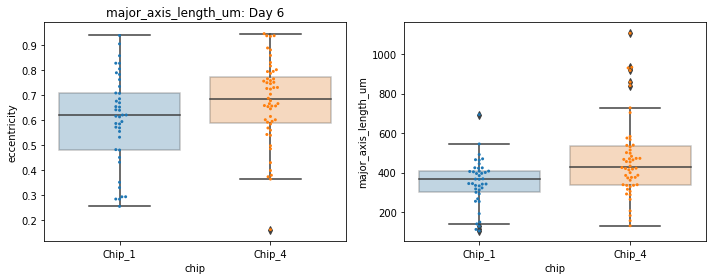

day 7


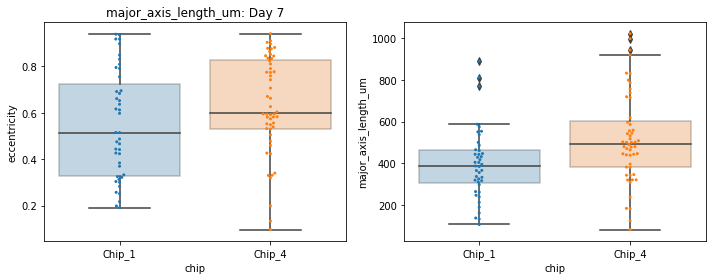

In [19]:
plot_days(dfs_all)

In [32]:
def plot_cond(dfs_all, cond='chip', x='day', y=['eccentricity', 'major_axis_length_um'], figsize=(10,4)):
    for cell_num in dfs_all[cond].unique():
        print(f'cond {cell_num}')
        fig, ax = plt.subplots(ncols=2, figsize=figsize)
        for _ax, _y in zip(ax, y):
            df = dfs_all[dfs_all[cond] == cell_num]
            sns.swarmplot(data=df, x=x, y=_y, ax=_ax, size=3)
            sns.boxplot(data=df, x=x, y=_y, boxprops=dict(alpha=.3), ax=_ax)
            _ax.set_title(f'{_y} `{cell_num}`')

        plt.tight_layout()
        plt.show()

cond Chip_1


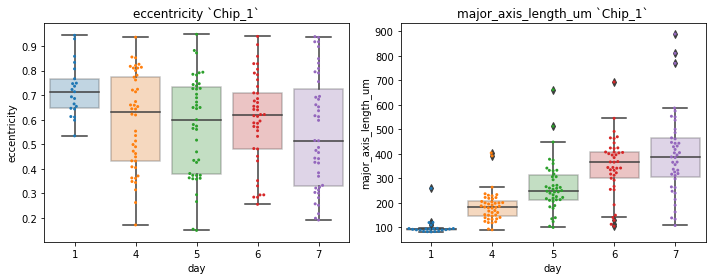

cond Chip_2


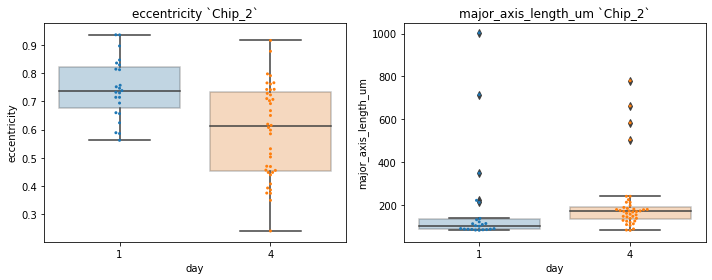

cond Chip_3


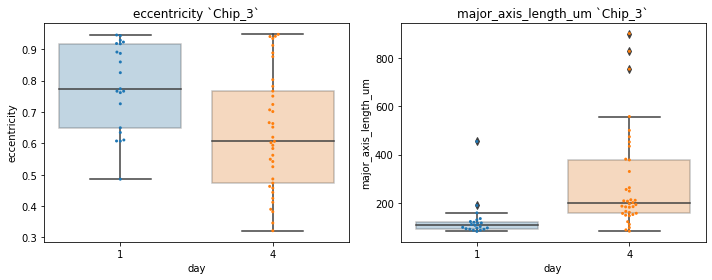

cond Chip_4


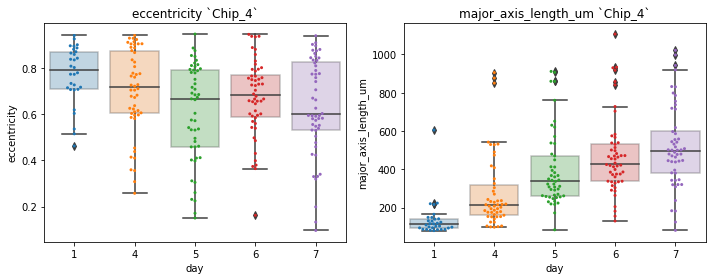

In [33]:
plot_cond(dfs_all)

In [34]:
def plot_all(dfs_all, cond='chip', x='day', y=['eccentricity', 'major_axis_length_um'], figsize=(10,4)):
    fig, ax = plt.subplots(1, len(y), figsize=(12,4), facecolor='w')
    
    for _ax, _y in zip(ax, y):
        sns.swarmplot(data=dfs_all, x=x, y=_y, hue=cond, ax=_ax, size=3, dodge=True)
        sns.boxplot(data=dfs_all, x=x, y=_y, hue=cond, boxprops=dict(alpha=.3), ax=_ax, dodge=True)
        _ax.set_title(f'{_y}')

    plt.tight_layout()


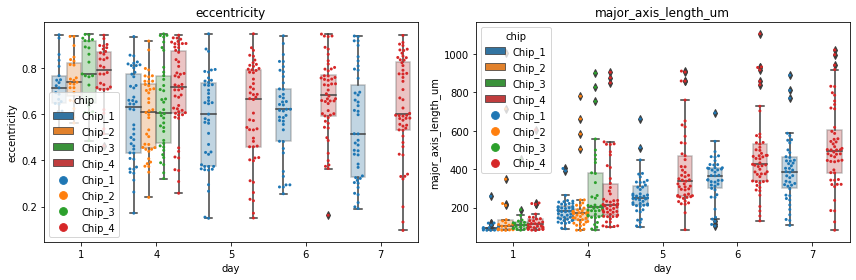

In [35]:
plot_all(dfs_all)

Text(0.5, 1.0, 'Major axis length, um')

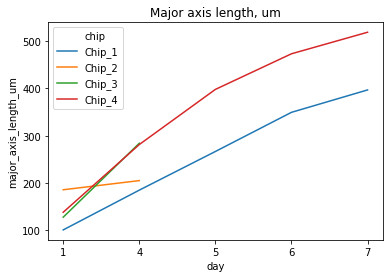

In [36]:
sns.lineplot(x='day', y='major_axis_length_um', hue='chip',data=dfs_all, ci=None)
plt.title('Major axis length, um')

Text(0.5, 1.0, 'Eccentricity')

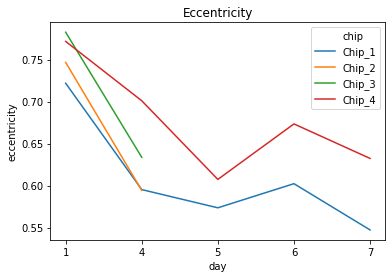

In [37]:
sns.lineplot(x='day', y='eccentricity', hue='chip',data=dfs_all, ci=None)
plt.title('Eccentricity')